Loading important modules

In [ ]:
import sympy as smp
from sympy import *

Question 1

In [ ]:
# Constructing given function f(x) taking a = 10
a = 10
x, y = smp.symbols('x y')
f = 1 / smp.sqrt(a * x + 1)

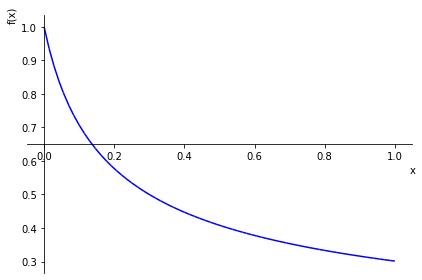

In [ ]:
# Graphing the function from 0 to 1
graph1 = plot(f, (x, 0, 1), line_color='b')

One way to numerically estimate the area is using numerical integration. So, we using trapezoid rule, I kept 'n' number of trapezoids under the curve to estimate its area for x = 0 to 1.

Consider that we had n = 1. This implies we have one trapezoid which is spaced from x = 0 to 1 under the curve. Its visual representation will look as follows:


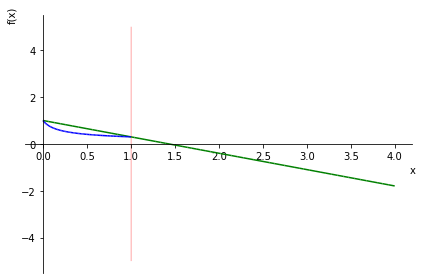

In [ ]:
# top-side of trapezoid, calculated using y-y1 = m(x-x2)
g = 1 + (1/smp.sqrt(11) - 1) * x 
# right side of trapezoid
h = plot_implicit(y - 1, y_var=(y, 0, 4), show=False, line_color='r')
graph1_2 = plot(g, (x, 0, 4), show=False, line_color='g')
graph1_2.extend(h)
graph1_2.extend(graph1)
graph1_2.show()

Estimated Area under the curve is the area of trapezoid. It's given by A = 1/2 * (p1 + p2) * h where p1 and p2 are length of parallel sides and h is the height of trapezoid.

In [ ]:
p1 = 1 # parallel height of trapezoid
p2 = 1 / (11 ** (1/2)) # parallel height of trapezoid
h = 1 # as n = 1
estimated_area = 1/2 * h * (p1 + p2) 
print("Estimated Area = ", estimated_area)

Estimated Area =  0.6507556722888819


If n is infinitely many, the estimate will be even closer to the actual area. For simplicity lets take n = 5, which implies 5 trapezoid with 6 parallel sides.

In [ ]:
p0 = 1
p1 = 1 / (3 ** (1/2)) 
p2 = 1 / (5 ** (1/2)) 
p3 = 1 / (7 ** (1/2)) 
p4 = 1 / (9 ** (1/2))  
p5 = 1 / (11 ** (1/2)) 
# height of each trapezium
h = 1 / 5
estimated_area = 1/2 * h * (p0 + 2 * (p1 + p2 + p3 + p4) + p5) 
print("Closer Estimated Area = ", estimated_area)

Closer Estimated Area =  0.4773234686642052


Area under the curve using mathematica

In [ ]:
# Expressing the integral
area = smp.integrate(f, (x, 0, 1))
print("Actual area: ", area)

Actual area:  -1/5 + sqrt(11)/5


Question 2

In [ ]:
# Constructing given functions
gx = smp.exp(x)
hx = smp.sqrt(a * x) + 1 

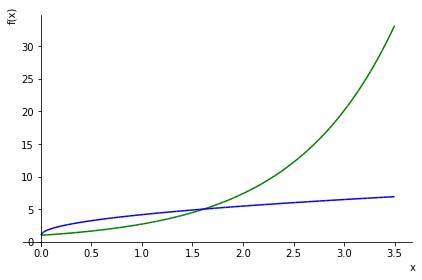

In [ ]:
# graphing both functions 
graph2 = plot(gx, (x, 0, 3.5), show=False, line_color='g')
curve2 = plot(hx, (x, 0, 3.5), show=False, line_color='b')
graph2.extend(curve2)
graph2.show()

In [ ]:
# looking at the graph, point of intersection is approaximately x = 1.65.
approx_intersection_points = (1.65, (10 * 1.65) ** (1/2) + 1)
print("Approximate point of intersection: ", approx_intersection_points)

Approximate point of intersection:  (1.65, 5.06201920231798)


Applying numerical iteration, the Newton's Numerical Approximation method 

In [ ]:
# Newton's Numerical iteration calculator function
def numerical_iterator(fx, x_final, n):
    for i in range(n):
        x_final = x_final  - (fx.subs(x, x_final))/(smp.diff(fx, x)) # newton approximation formula
    return x_final

Calling the numerical iterator function

In [ ]:
# constructing point of intersection function
fx = gx - hx
# taking a starting value of 1.65 and 5 iterations
numerical_x = numerical_iterator(fx, 1.65, 5)  # can be expressed as a float value, but takes infinite time
numerical_y = gx.subs(x, numerical_x) # can be expressed as a float value, but takes infinite time
numerical_intersection_points = (numerical_x, numerical_y)
print("Approximate point of intersection: ", numerical_intersection_points)

Approximate point of intersection:  (1.65 - (-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) - 1 + 5.20697982717985*exp(-(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))))/(exp(x) - sqrt(10)/(2*sqrt(x))) - (-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) - 1 + 5.20697982717985*exp(-(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))))/(exp(x) - sqrt(10)/(2*sqrt(x))) - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) + 5.20697982717985*exp(-(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) - 1 + 5.20697982717985*exp(-(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqr

Area between the curves

In [ ]:
# Using the approximate value
approx_area = smp.integrate(fx, (x, 0, approx_intersection_points[0]))
print("Approx area: ", approx_area)
# Using the numercial estimate value
numerical_area = smp.integrate(fx, (x, 0, numerical_x))
print("Numerical area: ", numerical_area)

Approx area:  2.55697982717985 - 1.41297558365316*sqrt(10)
Numerical area:  -1.41297558365316*sqrt(10)*(1 - 0.606060606060606*(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) - 1 + 5.20697982717985*exp(-(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))))/(exp(x) - sqrt(10)/(2*sqrt(x))) - 0.606060606060606*(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) - 1 + 5.20697982717985*exp(-(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))))/(exp(x) - sqrt(10)/(2*sqrt(x))) - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) + 5.20697982717985*exp(-(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2

Volume of solid rotating about y-axis

In [ ]:
# Constructing the integral function
hx = 2 * smp.pi * x * hx
# Using approximate value
approx_volume = smp.integrate(hx, (x, 0, 1.65))
print("Approx volume rotating through y-axis: ",  approx_volume)
# Using numerical estimate value
numerical_volume = smp.integrate(hx, (x, 0, numerical_x))
print("Numerical volume rotating through y-axis: ",  numerical_volume)

Approx volume rotating through y-axis:  2*pi*(1.36125 + 1.39884582781663*sqrt(10))
Numerical volume rotating through y-axis:  2*pi*(1.39884582781663*sqrt(10)*(1 - 0.606060606060606*(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) - 1 + 5.20697982717985*exp(-(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))))/(exp(x) - sqrt(10)/(2*sqrt(x))) - 0.606060606060606*(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) - 1 + 5.20697982717985*exp(-(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))))/(exp(x) - sqrt(10)/(2*sqrt(x))) - 0.606060606060606*(4.20697982717985 - 1.28452325786651*sqrt(10))/(exp(x) - sqrt(10)/(2*sqrt(x)))) + 5.20697982717985*exp(-(-1.28452325786651*sqrt(10)*sqrt(1 - 0.606060606060606*(4.2069798271

Question 3 

In [ ]:
# Constructing given function at the left
n = a
fx = smp.log(x) ** (n)

In [ ]:
# Finding the integral of given function at left
left_integral = smp.integrate(fx)
print(left_integral)

x*log(x)**10 - 10*x*log(x)**9 + 90*x*log(x)**8 - 720*x*log(x)**7 + 5040*x*log(x)**6 - 30240*x*log(x)**5 + 151200*x*log(x)**4 - 604800*x*log(x)**3 + 1814400*x*log(x)**2 - 3628800*x*log(x) + 3628800*x


From above, we see that the left_integral has 11 terms for n = a = 10. As n approaches a bigger number, say ∞, the number of terms in Integral (I) also approaches ∞. 

Such a bigger calculation would consume a lot of processing time and storage. Therefore, it would be better to look on simplifying and reducing the number of terms. 

In [ ]:
# Constructing the given function at right
right_term2 = n * smp.integrate(smp.log(x) ** (n - 1))
right_term1 = x * (smp.log(x) ** n)
right_integral = right_term1 - right_term2
if left_integral ==  right_integral:
  print("Integrals in both the sides are equal. ** Proved **")
else:
  print("Something not same. ** Not Proved **")

Integrals in both the sides are equal. ** Proved **
